# Fordgobike Trip data 2017
## by (Faridah Albalawi)



## Preliminary Wrangling

Dataset for a regional public bicycle sharing system in San Francisco.

The dataset provided by https://www.lyft.com/bikes/bay-wheels/system-data for public use,Contains a data for

each trip is anonymized and includes:

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# read csv file into dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# make a copy 
copy_df=df.copy()
copy_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
#the number of null values in each column
copy_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [6]:
#check for duplicates in the dataset
sum(copy_df.duplicated())

0

In [7]:
copy_df['end_time'].max(),copy_df['start_time'].min()

('2018-01-01 15:12:50.2450', '2017-06-28 09:47:36.3470')



## Investigation Overview

> Findaing the impact of dayofweek and user type on duration and distance.

## Dataset Overview

> This dataset includes,13 columns and 519700 rows , non of the rows are duplicate ,and there are no missing values. we will analysis the trips data from 2017-06-28 09:47:36.3470, to 2018-01-01 15:12:50.2450.

### What is the structure of your dataset?

> This dataset includes,13 columns and 519700 rows , non of the rows are duplicate ,and there are no missing values. there are some columns need to convert the datatype. we will analysis the trips data from 2017-06-28 09:47:36.3470, to 2018-01-01 15:12:50.2450

### What is/are the main feature(s) of interest in your dataset?

> 1_ What is Frequency of the day of the week for each user type.

> 2_ Dose the day of the week and user type have an impact on trip durations .
  
> 3_ What is the relationship between  durations and distances 
  


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  start_dayofweek, user_type, duration_sec, distance.




In [8]:
#convert columns to datetime
copy_df['start_time']=pd.to_datetime(copy_df['start_time'])

copy_df['end_time']=pd.to_datetime(copy_df['end_time'])
copy_df[['start_station_id','end_station_id','bike_id']] = copy_df[['start_station_id','end_station_id','bike_id']].astype(str)

In [9]:
# add new column dayofweek from start_time column
copy_df['start_dayofweek'] = pd.DatetimeIndex(copy_df['start_time']).strftime('%a')
copy_df['end_dayofweek'] = pd.DatetimeIndex(copy_df['end_time']).strftime('%a')

In [10]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [11]:
copy_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236
std,3444.146451,0.086305,0.105573,0.086224,0.105122
min,61.000000,37.317298,-122.444293,37.317298,-122.444293
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [12]:
day_counts=copy_df['start_dayofweek'].value_counts()
day_counts


Tue    87865
Wed    87752
Thu    85243
Mon    81410
Fri    81165
Sat    50874
Sun    45391
Name: start_dayofweek, dtype: int64

In [13]:
dayorder=day_counts.index
dayorder

Index(['Tue', 'Wed', 'Thu', 'Mon', 'Fri', 'Sat', 'Sun'], dtype='object')

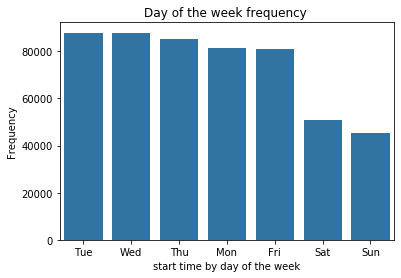

In [14]:
#frequency of dayofweek

base_color = sb.color_palette()[0]
sb.countplot(data=copy_df, x='start_dayofweek', color=base_color,order=dayorder)
plt.xlabel('start time by day of the week')
plt.ylabel('Frequency')
plt.title('Day of the week frequency ');







working days have the most number trips,and the weekend days have the least number of trips
the user use the Ford gobike system the most  in working days

(-1.105256527675945,
 1.1026006055306774,
 -1.1040707690728253,
 1.103786364133797)

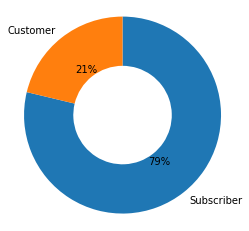

In [15]:
#pie chart for the qualitative variable user_type
user_counts = copy_df['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90,autopct='%1.0f%%'
,counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square')

most of the user are Subscribers with 79% ,and for Customers 21% of the users

In [16]:
copy_df['duration_sec'].describe()


count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

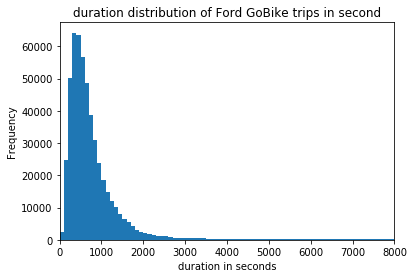

In [17]:
# duration_sec Distribution 
bin_edges = np.arange(0, copy_df['duration_sec'].max()+100, 100)
plt.hist(data=copy_df, x='duration_sec',bins=bin_edges)
plt.xlim(0, 8000)
plt.xlabel('duration in seconds')
plt.ylabel('Frequency')
plt.title('duration distribution of Ford GoBike trips in second');

The minimum duration is 61 seconds and the maximum is  86369 seconds ,As we can see from the above plot, frequent trips duration  take  from 300 to 700 seconds .


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [18]:
def distance(lon1, lat1, lon2, lat2):
#radius of the Earth in km
    R = 6371.0

#change in coordinates
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)

#Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    distance = R * c

    return distance

In [19]:
copy_df['distance'] = copy_df.apply(lambda i: distance(i['start_station_longitude'],i['start_station_latitude'],
                            i['end_station_longitude'],i['end_station_latitude']), axis=1)

In [20]:
#distance in km
copy_df['distance']

0         1.172480
1         3.528204
2         0.000000
3         1.048818
4         0.790002
            ...   
519695    1.477440
519696    1.155538
519697    1.203994
519698    0.265599
519699    0.770668
Name: distance, Length: 519700, dtype: float64

In [21]:
copy_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_dayofweek,end_dayofweek,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sun,Mon,1.172480
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sun,Mon,3.528204
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sun,Mon,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sun,Mon,1.048818
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sun,Mon,0.790002


In [22]:
copy_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236,1.755590
std,3444.146451,0.086305,0.105573,0.086224,0.105122,1.112930
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,0.000000
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345,1.005698
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525,1.543624
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034,2.273726
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119,75.552866


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there are many stations that we can't handle in one chart

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we need to extract the day of the week to know what are the busiest days ,then we can find a pattern  in those days for users and stations
>create distance column from longitudes and latitudes columns to find distance between start and end stations

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## 1_ What is Frequency of the day of the week for each user type.


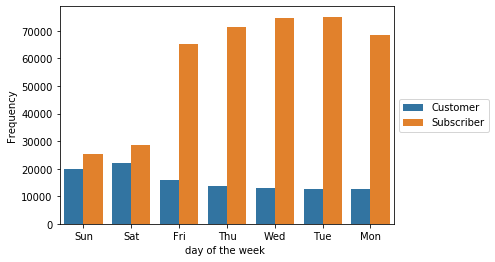

In [23]:
#two qualitative  variables

sb.countplot(data=copy_df, x='start_dayofweek', hue=copy_df['user_type'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequency')
plt.xlabel('day of the week ');

we can see Customers almost steady frequency in working days but we can notice a little increase in weekends 
,and for Subscribers we can see a Significant difference working days and weekends 

(0, 10)

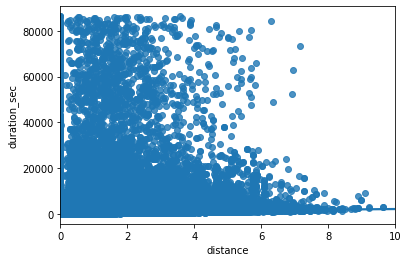

In [24]:
#two quantitative variables 
sb.regplot(data = copy_df, x = 'distance', y = 'duration_sec')
plt.xlim(0,10)#remove outliers

weak Correlation between distance and duration_sec.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> user_type and start_dayofweek impact other features
> weak Correlation between distance and duration_sec.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> user_type and dayofweek with duration_sec

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


## 2_ Dose the day of the week and user type have an impact on trip durations .


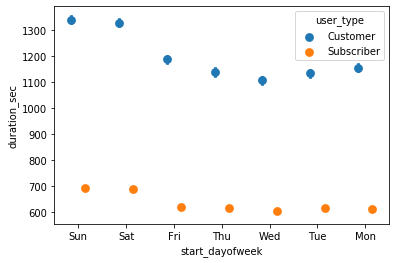

In [34]:
ax = sb.pointplot(data=copy_df.query('duration_sec < 5000'), x = 'start_dayofweek', y = 'duration_sec', hue = 'user_type',
 dodge = 0.3, linestyles = "")

For customers Subscribers  user we can see increase in duration on weekend ,for subscribers steady pattern on weekdays,Customers tend to ride to longer ditanation


## 3_ What is the relationship between durations and distances for each dayofweek and user type 

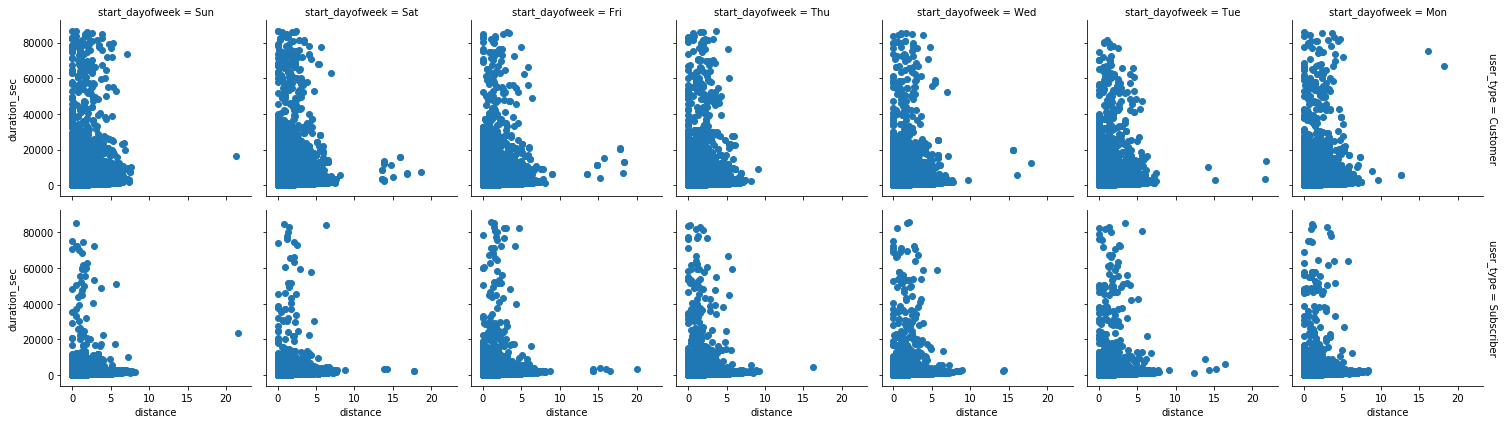

In [32]:
g = sb.FacetGrid(data = copy_df.query('distance < 50'), col = 'start_dayofweek', row = 'user_type', size = 3, margin_titles = True)
g.map(plt.scatter, 'distance', 'duration_sec')

there is no relation between duration_sec and distance,Customers tend to ride to longer ditanation ,the subscribers have a steady pattern on all days

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The customers tend to use the gobike service on weekends, and the subscribers use the service on weekdays the most,but both the customers and subscribers tend to used for long duration on weekends,Customers tend to ride to longer ditanation .

### Were there any interesting or surprising interactions between features?

> that ther isn't relationship between distance and duration 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!